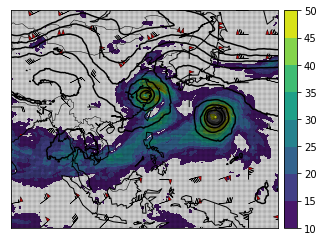

In [1]:
from netCDF4 import Dataset
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
f = Dataset('src/typhoneuv.nc')#(meteo_file, mode='r')
f2 = Dataset('src/typhone.nc')
# 获取经纬度的值
lons = f.variables['lon_0'][:]
lats = f.variables['lat_0'][::-1]
lat2 = f2.variables['lat_0'][::-1]
lon2 = f2.variables['lon_0']
# 获取200风
u200 = f.variables['u200'][::-1,:]
v200 = f.variables['v200'][::-1,:]
# 获取500高度
hgt = f2.variables['hgt'][::-1,:]

# 获取850水汽通亮
qu = f2.variables['qu850'][::-1,:]
qv = f2.variables['qv850'][::-1,:]
q = f2.variables['qabs850'][::-1,:]
# 绘图
lons1, lats1 = np.meshgrid(lons, lats)
m = Basemap(llcrnrlat=-10,urcrnrlat=55,llcrnrlon=80,urcrnrlon=160)
x,y = m(lons1,lats1)
#nxv nyv控制风场的密度
##########################绘制200风场######################################
nxv =10; nyv = 10
udat, vdat, xv, yv = m.transform_vector(u200,v200,lons,lats,nxv,nyv,returnxy=True)
m.barbs(xv,yv,udat,vdat,length=5,barbcolor='k',flagcolor='r',linewidth=0.5)
m.drawcoastlines()
##########################################################################
##########################################################################
###contour contourf quiver
lonh, lath = np.meshgrid(lon2, lat2)
levels = [572,576,580,584,588,592]
m.contour(lonh,lath,hgt,colors='k',levels = levels)
levelsq = [10,15,20,25,30,35,40,45,50]
shade=m.contourf(lonh,lath,q,levels = levelsq)
m.colorbar(shade)
wind=m.quiver(lonh,lath,qu,qv,width=0.002,headwidth=2,headlength=4)
#m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose= True)
m.drawcountries()
##########################################################################

# ncl 脚本  /workspace/liyuan3970/study_demo/met_plot/利齐马/ncl_plot/uvhgt_plot.ncl


begin
;>---------------------------------------<
;            data　input
;>---------------------------------------<

;filetime = "gdas1.fnl0p25.2019081000.f00"

;time = "2019080806"
;time = "2019080912"
;time = "2019081000"
time = "2019081006"
;; time3 图片没有
wks = gsn_open_wks("png",time)
f = addfile("/home/liyuan3970/Data/data/meto_data/fnl/fnl_025/gdas1.fnl0p25."+time + ".f00.grib2", "r")
hgt = f->HGT_P0_L100_GLL0({50000}, :, :)
hgt = hgt * 0.1
u = f->UGRD_P0_L100_GLL0({20000}, ::4, ::4)
u = u * 2.5
v = f->VGRD_P0_L100_GLL0({20000}, ::4, ::4)
v =v * 2.5
rh = f->RH_P0_L100_GLL0({85000}, :, :)
t = f->TMP_P0_L100_GLL0({85000}, :, :)
u1 = f->UGRD_P0_L100_GLL0({85000}, :, :) ;*2.5
v1 = f->VGRD_P0_L100_GLL0({85000}, :, :) ;*2.5
p =850
;printVarSummary(rh)
;printVarSummary(t)
;printVarSummary(u)
;printVarSummary(v)
;计算水汽通亮
q1 = mixhum_ptrh(conform(rh,p,0),t,rh,-2)
copy_VarCoords(rh, q1)
;printVarSummary(q1)
;计算水汽通量
qu1 = q1 * u1 /9.8 ;*10
qv1 = q1 * v1 /9.8 ;*10
copy_VarCoords(rh, qu1)
copy_VarCoords(rh, qv1)
qabs = wind_speed(qu1, qv1)
copy_VarCoords(rh,qabs)
;printVarSummary(qu1)
;printVarSummary(qv1)
;计算水汽通量散度
qduv = uv2dvF_Wrap(qu1,qv1)
;qduv =abs(qduv *10000)
copy_VarCoords(rh, qduv)
;printVarSummary(qduv)
;>---------------------------------------<
;            set for the wks and golbal res
;>---------------------------------------<
;wks = gsn_open_wks("eps","2019-08-10-06:00")
res = True
res@gsnDraw = False
res@gsnFrame = False
res@gsnLeftString = ""
res@gsnRightString = " "
;res@gsnCenterString = "2019-08-10-06"
;>---------------------------------------<
;            set for the map
;>---------------------------------------<
mpres = res
mpres@mpFillOn                = False
mpres@mpCenterLonF            = 120
mpres@mpMinLatF               = -10.
mpres@mpMaxLatF               = 55.
mpres@mpMinLonF               = 80.
mpres@mpMaxLonF               = 160.
mpres@mpDataBaseVersion       = "MediumRes"
mpres@mpDataSetName           = "Earth..4"
mpres@mpOutlineSpecifiers     = (/"China:states"/)
mpres@pmTickMarkDisplayMode  = "Always"
mpres@tmXBMajorLengthF = 0.005
mpres@mpOutlineOn =True
mpres@mpCountyLineThicknessF = 10
mpres@mpGeophysicalLineThicknessF = 0.01
mpres@mpPerimOn  =True
mpres@mpPerimLineThicknessF   = 0.8

;>---------------------------------------<
;>---------------------------------------<
;       set resource for contour plot
;>---------------------------------------<
cnres = res
cnres@cnSmoothingOn = True ;
cnres@cnSmoothingDistanceF   = 0.001
cnres@cnLevelSelectionMode   = "ManualLevels"
cnres@cnMinLevelValF = 500
cnres@cnMaxLevelValF = 600
cnres@cnLevelSpacingF = 4
cnres@cnInfoLabelOn = False
cnres@cnLineLabelsOn          =  True
cnres@cnLineLabelFontHeightF = 0.01
cnres@cnLineThicknessF = 2.2
cnres@cnLineLabelInterval = 1
;>---------------------------------------<
;>---------------------------------------<
;     set resource for windBarb plot
;>---------------------------------------<
vcres                           = res
vcres@gsnAddCyclic = False
vcres@vcGlyphStyle               = "WindBarb"
vcres@vcRefLengthF               = 0.02
vcres@vcRefAnnoOn               = False
vcres@vcWindBarbLineThicknessF  = 0.5
vcres@vcWindBarbColor = "red"
vcres@vcMinMagnitudeF = 2
vcres@vcWindBarbTickLengthF = 0.65
vcres@vcMinDistanceF            =0.035
;>---------------------------------------<



;>---------------------------------------<
;     set resource for uvq plot
;>---------------------------------------<
vqres                           = res

vqres@vcLineArrowColor        = "green"        ; change vector color
;vqres@vcLineArrowThicknessF   = 2.0               ; change vector thickness
vqres@vcRefAnnoOn  =True
vqres@vcRefAnnoOn = False
vqres@vcRefAnnoArrowUseVecColor    =False ;Ref颜色独立
vqres@vcRefAnnoPerimOn =False
vqres@vcRefAnnoArrowLineColor="green"
vqres@vcRefAnnoString1              ="2m/s" ;Ref框里写字
vqres@vcRefAnnoFontHeightF  =0.02
vqres@vcRefAnnoFontThicknessF =0.02
vqres@vcRefAnnoJust    =      "TopRight"

vqres@vcRefAnnoString2   =" "           ;去掉reference vector字样
;vqres@vcRefMagnitudeF           = 1.3            ; define vector ref mag
vqres@vcRefLengthF              = 0.055           ; define length of vec ref
vqres@vcRefAnnoOrthogonalPosF   =-1.22;;;-1.36            ; move ref vector
vqres@vcMinDistanceF            =0.04
vqres@vcLineArrowThicknessF =1.5
;>---------------------------------------<


;>---------------------------------------<
;     set resource for dquv plot
;>---------------------------------------<

rts = res
;rts@gsnDraw = False
;rts@gsnFrame = False
rts@cnFillOn = True
rts@cnLinesOn = False
rts@cnLineLabelsOn = False
rts@cnInfoLabelOn = False
rts@lbLabelBarOn = True;False
rts@lbOrientation = "Vertical"
  
rts@cnLevelSelectionMode="ManualLevels"
rts@cnMinLevelValF=10
rts@cnMaxLevelValF=50
rts@cnLevelSpacingF=5
rts@cnFillColors = (/0,114,104,74,84,74,54,34,24,14/)
;rts@cnMonoFillPattern = False
rts@gsnCenterString = time


;;set for dot res
;rts@cnMonoFillPattern = False
;rts@cnMonoFillPattern = False
;rts@cnFillPatterns = (/17,17,17,17,17,17,-1,-1,-1,-1,-1,-1/)
;rts@cnFillScales         = (/4,4,4,4,4,4,1,1,1,1,1,1/)
;rts@cnFillDotSizeF       = 0.005
;rts@cnFillColors = (/5,5,5,5,5,5,0,0,0,0,0/)

;rts@cnFillPatterns = (/-1,-1,-1,-1,-1,-1,17,17,17,17,17,17/)
;rts@cnFillScales         = (/1,1,1,1,1,1,5,5,5,5,5,5/)
;rts@cnFillDotSizeF       = 0.005
;rts@cnFillColors = (/0,0,0,0,0,0,240,240,240,240,240/)
;rts@gsnLeftString = ""
mapplot = gsn_csm_map(wks, mpres)
cnplot = gsn_csm_contour(wks, hgt, cnres)
vcplot = gsn_csm_vector(wks, u1, v1, vcres)
;vqplot = gsn_csm_vector(wks, qu1, qv1, vqres)

;vdqplot = gsn_csm_contour(wks,qduv, rts)
vdqplot = gsn_csm_contour(wks,qabs, rts)

overlay(mapplot, vdqplot)
overlay(mapplot, cnplot)
overlay(mapplot, vcplot)
;overlay(mapplot, vqplot)
;overlay(mapplot, vdqplot)
draw(mapplot)
frame(wks)
end

